 ## 대표 색상(H고정) 관련 가설검증
 
    최초 작성일 : 2020/03/23
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        설문지(2) 사용 2번 문항
    
        - 설문조사 결과 그래프로 시각화
        
        - 성별에 따른 색상(FixedHue, bright) 인식 차이
        
        - 연령에 따른 색상(FixedHue, bright) 인식 차이
        
        - 패션 관심도에 따른 색상(FixedHue, bright) 인식 차이
        
        - definition + need 묶어서 색상(FixedHue, bright) 인식 차이 
        
        - Sex + Age 묶어서 색상(FixedHue, bright) 인식 차이

# 색상고정, harmony

### 설문조사 결과를 토대로 대표 색상 설정

In [1]:
# 데이터 불러오기

hFixed_harmony <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/hFixed_harmony.csv")
str(hFixed_harmony)
head(hFixed_harmony)

'data.frame':	576 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ select: Factor w/ 5 levels "-S-V","-S+V",..: 3 3 3 3 3 2 2 3 4 3 ...
 $ class : Factor w/ 6 levels "comp","doubleness1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,select,class,cnt
0,+S-V,comp,1
1,+S-V,comp,1
2,+S-V,comp,1
3,+S-V,comp,1
4,+S-V,comp,1
5,-S+V,comp,1


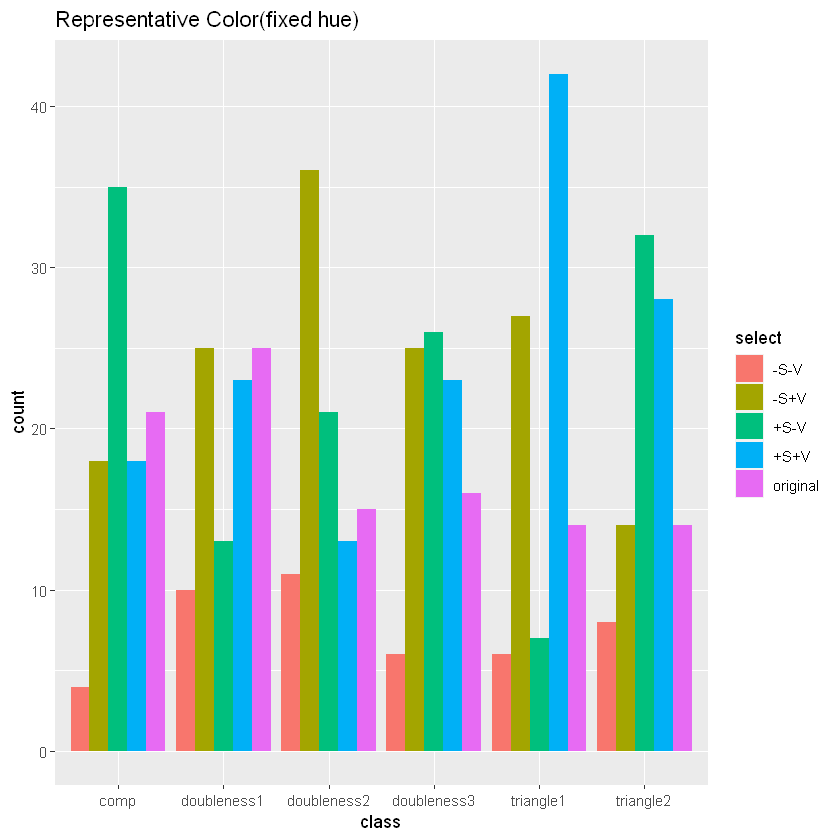

In [2]:
# 그래프로 상태 먼저 확인

# install.packages("ggplot2")
library("ggplot2")

# 각 샘플마다 나눠서 보기
ggplot(hFixed_harmony, aes(class, fill=select)) + geom_bar(position="dodge") + labs(title="Representative Color(fixed hue)")
# 원래는 original이 가장 밝게 보여주는 색이지만
# 엄청 다양하네... 전체적으로 봐보자

In [3]:
# 전체결과보기 위한 dataframe 새로 만들기
t_sv <- with(hFixed_harmony, sum(cnt[select=="-S-V"]))
t_sV <- with(hFixed_harmony, sum(cnt[select=="-S+V"]))
t_Sv <- with(hFixed_harmony, sum(cnt[select=="+S-V"]))
t_SV <- with(hFixed_harmony, sum(cnt[select=="+S+V"]))
t_origin <- with(hFixed_harmony, sum(cnt[select=="original"]))

# column 만들기
total <-c(t_sv, t_sV, t_Sv, t_SV, t_origin)

# dataframe 만들기
df_hFixed_harmony <- data.frame(total)
rownames(df_hFixed_harmony) <- c("-S-V", "-S+V", "+S-V", "+S+V", "origial")
library(tibble)
df_hFixed_harmony2 <- rownames_to_column(df_hFixed_harmony, var="select")
df_hFixed_harmony2

Warning message:
"package 'tibble' was built under R version 3.6.2"

select,total
-S-V,45
-S+V,145
+S-V,134
+S+V,147
origial,105


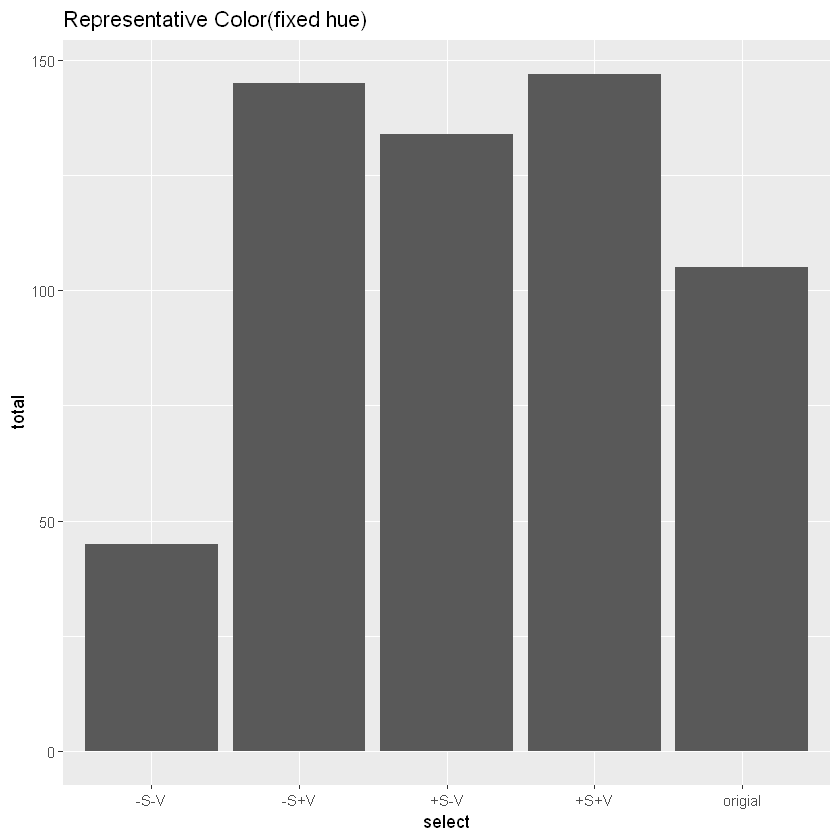

In [4]:
# 전체 결과 그래프로 확인

ggplot(df_hFixed_harmony2, aes(x=select, y=total)) + geom_bar(stat="identity") + labs(title="Representative Color(fixed hue)")

#### 결과 분석

    +S+V > -S+V > +S-V 순으로 가장 많이 뽑힘
    hueFixed_harmony의 경우 +S+V의 값이 대표 색상값으로 성립이라 할 수 있다
    하지만 -S+V와 2만큼 차이나므로 
    harmony와 bright를 합쳐서 보면 -S+V 선택 받은 값이 가장 많을 것이기 때문에
    -S+V를 대표 색상값으로 지정하자

# 전체

### 성별에 따른 대표 색상(색상고정, harmony) 인식 차이 

    귀무가설 : 성별에 따라 대표 색상(색상고정, harmony) 인식 차이가 없다
    대립가설 : 성별에 따라 대표 색상(색상고정, harmony) 인식 차이가 있다
    
    - 대표 색상(색상고정, bright) : -S+V
    - chisq.test 사용

In [5]:
# 데이터 불러오기

S_hFH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/S_hFH_cnt.csv")
str(S_hFH_cnt)
head(S_hFH_cnt)

'data.frame':	576 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex   : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ select: Factor w/ 5 levels "-S-V","-S+V",..: 3 3 3 3 3 2 2 3 4 3 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,select,cnt
0,Female,+S-V,1
1,Male,+S-V,1
2,Female,+S-V,1
3,Male,+S-V,1
4,Female,+S-V,1
5,Female,-S+V,1


In [7]:
## 데이터프레임 재생성

# 남
Male_T <- with(S_hFH_cnt, sum(cnt[sex=="Male" & select == "-S+V"]))
Male_F <- with(S_hFH_cnt, sum(cnt[sex=="Male" & select != "-S+V"]))

# 여
Female_T <- with(S_hFH_cnt, sum(cnt[sex=="Female" & select == "-S+V"]))
Female_F <- with(S_hFH_cnt, sum(cnt[sex=="Female" & select != "-S+V"]))

# column 생성
Male <- c(Male_T, Male_F)
Female <- c(Female_T, Female_F)

# dataframe 만들기
df_S_hFH_cnt <- data.frame(Male, Female)
df_S_hFH_cnt <- t(df_S_hFH_cnt)
colnames(df_S_hFH_cnt) <- c("True", "False")


## 행, 열 각각의 합계 알아보기
addmargins(df_S_hFH_cnt)


## 카이제곱
chisq.test(df_S_hFH_cnt)
# p-value = 0.7855
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 성별에 따라 안면부위 인식 차이가 없음을 알 수 있다

,True,False,Sum
Male,51,159,210
Female,94,272,366
Sum,145,431,576



	Pearson's Chi-squared test with Yates' continuity correction

data:  df_S_hFH_cnt
X-squared = 0.074084, df = 1, p-value = 0.7855


### 연령에 따른 대표 색상(색상고정, harmony) 인식 차이 

    귀무가설 : 연령에 따라 대표 색상(색상고정, harmony) 인식 차이가 없다
    대립가설 : 연령에 따라 대표 색상(색상고정, harmony) 인식 차이가 있다
    
    - 대표 색상(색상고정, harmony) : -S+V
    - chisq.test 사용

In [8]:
# 데이터 불러오기

A_hFH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/A_hFH_cnt.csv")
str(A_hFH_cnt)
head(A_hFH_cnt)

'data.frame':	576 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ age   : int  20 20 20 20 20 30 30 20 30 20 ...
 $ select: Factor w/ 5 levels "-S-V","-S+V",..: 3 3 3 3 3 2 2 3 4 3 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,age,select,cnt
0,20,+S-V,1
1,20,+S-V,1
2,20,+S-V,1
3,20,+S-V,1
4,20,+S-V,1
5,30,-S+V,1


In [10]:
## 데이터프레임 재생성

teens_T <- with(A_hFH_cnt, sum(cnt[age == "10" & select == "-S+V"]))
teens_F <- with(A_hFH_cnt, sum(cnt[age == "10" & select != "-S+V"]))

twenty_T <- with(A_hFH_cnt, sum(cnt[age == "20" & select == "-S+V"]))
twenty_F <- with(A_hFH_cnt, sum(cnt[age == "20" & select != "-S+V"]))

thirty_T <- with(A_hFH_cnt, sum(cnt[age == "30" & select == "-S+V"]))
thirty_F <- with(A_hFH_cnt, sum(cnt[age == "30" & select != "-S+V"]))

forty_T <- with(A_hFH_cnt, sum(cnt[age == "40" & select == "-S+V"]))
forty_F <- with(A_hFH_cnt, sum(cnt[age == "40" & select != "-S+V"]))

fifty_T <- with(A_hFH_cnt, sum(cnt[age == "50" & select == "-S+V"]))
fifty_F <- with(A_hFH_cnt, sum(cnt[age == "50" & select != "-S+V"]))

teens <- c(teens_T, teens_F)
twenty <- c(twenty_T, twenty_F)
thirty <- c(thirty_T, thirty_F)
forty <- c(forty_T, forty_F)
fifty <- c(fifty_T, fifty_F)
             
df_Age_Region <- data.frame(teens, twenty, thirty, forty, fifty)
df_Age_Region <- t(df_Age_Region)
colnames(df_Age_Region) <- c("True", "False")
# df_Age_Region


## 행, 열 각각의 합계 알아보기

addmargins(df_Age_Region)
# 합계값이 동일하지 않으므로 chisq.test 사용


## 카이제곱

chisq.test(df_Age_Region)
# p-value = 0.04615
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test

fisher.test(df_Age_Region)
# p-value = 0.05686
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False,Sum
teens,18,24,42
twenty,80,256,336
thirty,34,92,126
forty,4,14,18
fifty,9,45,54
Sum,145,431,576


Warning message in chisq.test(df_Age_Region):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_Age_Region
X-squared = 9.6815, df = 4, p-value = 0.04615



	Fisher's Exact Test for Count Data

data:  df_Age_Region
p-value = 0.05686
alternative hypothesis: two.sided


### 패션 관심도에 따른 대표 색상(색상고정, harmony) 인식 차이 

    귀무가설 : 패션 관심도에 따라 대표 색상(색상고정, harmony) 인식 차이가 없다
    대립가설 : 패션 관심도에 따라 대표 색상(색상고정, harmony) 인식 차이가 있다
    
    - 대표 색상(색상고정, harmony) : -S+V
    - chisq.test 사용

In [12]:
# 데이터 불러오기

I_hFH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/I_hFH_cnt.csv")
str(I_hFH_cnt)
head(I_hFH_cnt)

'data.frame':	576 obs. of  4 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ interest: int  3 5 5 3 3 4 3 3 5 1 ...
 $ select  : Factor w/ 5 levels "-S-V","-S+V",..: 3 3 3 3 3 2 2 3 4 3 ...
 $ cnt     : int  1 1 1 1 1 1 1 1 1 1 ...


X,interest,select,cnt
0,3,+S-V,1
1,5,+S-V,1
2,5,+S-V,1
3,3,+S-V,1
4,3,+S-V,1
5,4,-S+V,1


In [14]:
## 데이터프레임 재생성

I_True <- c()
I_False <- c()

for(i in seq(1,5, by=1)){
    True <- with(I_hFH_cnt, sum(cnt[interest==i & select =="-S+V"]))
    I_True[[(i)]] <- True
    
    False <- with(I_hFH_cnt, sum(cnt[interest==i & select != "-S+V"]))

    I_False[[i]] <- False
   
    
    interest_TF <- data.frame(True=I_True, False=I_False)
}

interest_TF

# 카이제곱

chisq.test(interest_TF)
# p-value = 0.1815
# 0.05보다 큰 값을 가지므로 귀무가설 성립

True,False
13,41
18,48
47,163
48,102
19,77



	Pearson's Chi-squared test

data:  interest_TF
X-squared = 6.2456, df = 4, p-value = 0.1815


### Defintion, Need 에 따른 대표 색상(색상고정, harmony) 인식 차이 

    귀무가설 : definition + need 에 따라 대표 색상(색상고정, harmony) 인식 차이가 없다
    대립가설 : definition + need 에 따라 대표 색상(색상고정, harmony) 인식 차이가 있다
    
    definition + need 묶은 방법
    : bright + bright
    : bright + harmony
    : harmony + bright
    : harmony + harmony
    
    - 대표 색상(색상고정, harmony) : -S+V
    - chisq.test 사용

In [2]:
# 데이터 불러오기

DN_hFH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/DN_hFH_cnt.csv")
str(DN_hFH_cnt)
head(DN_hFH_cnt)

'data.frame':	576 obs. of  5 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ definition: Factor w/ 2 levels "bright","harmony": 1 2 1 1 1 2 2 1 2 2 ...
 $ need      : Factor w/ 2 levels "bright","harmony": 1 2 1 2 1 2 1 1 1 2 ...
 $ select    : Factor w/ 5 levels "-S-V","-S+V",..: 3 3 3 3 3 2 2 3 4 3 ...
 $ cnt       : int  1 1 1 1 1 1 1 1 1 1 ...


X,definition,need,select,cnt
0,bright,bright,+S-V,1
1,harmony,harmony,+S-V,1
2,bright,bright,+S-V,1
3,bright,harmony,+S-V,1
4,bright,bright,+S-V,1
5,harmony,harmony,-S+V,1


In [18]:
## 데이터프레임 재생성

# bright + bright
BB_T <- with(DN_hFH_cnt, sum(cnt[definition == "bright" & need == "bright" & select == "-S+V"]))
BB_F <- with(DN_hFH_cnt, sum(cnt[definition == "bright" & need == "bright" & select != "-S+V"]))
             
# bright + harmony
BH_T <- with(DN_hFH_cnt, sum(cnt[definition == "bright" & need == "harmony" & select == "-S+V"]))
BH_F <- with(DN_hFH_cnt, sum(cnt[definition == "bright" & need == "harmony" & select != "-S+V"]))

# harmony + bright
HB_T <- with(DN_hFH_cnt, sum(cnt[definition == "harmony" & need == "bright" & select == "-S+V"]))
HB_F <- with(DN_hFH_cnt, sum(cnt[definition == "harmony" & need == "bright" & select != "-S+V"]))

# harmony + harmony
HH_T <- with(DN_hFH_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select == "-S+V"]))
HH_F <- with(DN_hFH_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select != "-S+V"]))

BB <- c(BB_T, BB_F)
BH <- c(BH_T, BH_F)
HB <- c(HB_T, HB_F)
HH <- c(HH_T, HH_F)

df_DN_hFH_cnt <- data.frame(BB, BH, HB, HH)
df_DN_hFH_cnt <- t(df_DN_hFH_cnt)
colnames(df_DN_hFH_cnt) <- c("True", "False")
# df_DN_hFB_cnt

## 행, 열 각각의 합계 알아보기
addmargins(df_DN_hFH_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_DN_hFH_cnt)
# p-value = 0.09866
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False,Sum
BB,29,85,114
BH,0,18,18
HB,27,75,102
HH,89,253,342
Sum,145,431,576


Warning message in chisq.test(df_DN_hFH_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_DN_hFH_cnt
X-squared = 6.2821, df = 3, p-value = 0.09866


#### Defintion, Need 에 따른 대표 색상(색상고정, harmony) 선택 분석 

In [19]:
df_DN_hFH_cnt

,True,False
BB,29,85
BH,0,18
HB,27,75
HH,89,253


### 결과 해석

    + BB, BH, HB, HH 에 따른 인식 차이 분석
        
    선택 개수 : BB 114  BH 18  HB 102  HH 342 
    definition과 need를 동일하게 선택한 결과가 많음
    
    맞춘 확률 : BB 25.4%   BH 0.0%   HB 26.5%   HH 26.0%
    음.. definition과 need를 동일하게 선택한 사람 위주로 봐야하나..
    

### Sex, Age 에 따른 대표 색상(색상고정, harmony) 인식 차이 

    귀무가설 : sex + age 에 따라 대표 색상(색상고정, harmony) 인식 차이가 없다
    대립가설 : sex + age 에 따라 대표 색상(색상고정, harmony) 인식 차이가 있다
    
    - 대표 색상(색상고정, harmony) : -S+V
    - chisq.test 사용

In [20]:
# 데이터 불러오기

SA_hFH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SA_hFH_cnt.csv")
str(SA_hFH_cnt)
head(SA_hFH_cnt)

'data.frame':	576 obs. of  5 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ age_class: int  20 20 20 20 20 30 30 20 30 20 ...
 $ select   : Factor w/ 5 levels "-S-V","-S+V",..: 3 3 3 3 3 2 2 3 4 3 ...
 $ cnt      : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,age_class,select,cnt
0,Female,20,+S-V,1
1,Male,20,+S-V,1
2,Female,20,+S-V,1
3,Male,20,+S-V,1
4,Female,20,+S-V,1
5,Female,30,-S+V,1


In [26]:
## 데이터프레임 재생성

# Female + 10 
F10_T <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "10" & select == "-S+V"]))
F10_F <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "10" & select != "-S+V"]))

# Female + 20 
F20_T <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "20" & select == "-S+V"]))
F20_F <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "20" & select != "-S+V"]))

# Female + 30 
F30_T <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "30" & select == "-S+V"]))
F30_F <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "30" & select != "-S+V"]))

# Female + 40 
F40_T <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "40" & select == "-S+V"]))
F40_F <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "40" & select != "-S+V"]))

# Female + 50 
F50_T <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "50" & select == "-S+V"]))
F50_F <- with(SA_hFH_cnt, sum(cnt[sex == "Female" & age_class == "50" & select != "-S+V"]))

# Male + 10 
M10_T <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "10" & select == "-S+V"]))
M10_F <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "10" & select != "-S+V"]))

# Male + 20 
M20_T <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "20" & select == "-S+V"]))
M20_F <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "20" & select != "-S+V"]))

# Male + 30 
M30_T <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "30" & select == "-S+V"]))
M30_F <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "30" & select != "-S+V"]))

# Male + 40 
M40_T <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "40" & select == "-S+V"]))
M40_F <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "40" & select != "-S+V"]))

# Male + 50 
M50_T <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "50" & select == "-S+V"]))
M50_F <- with(SA_hFH_cnt, sum(cnt[sex == "Male" & age_class == "50" & select != "-S+V"]))


F10 <- c(F10_T, F10_F)
F20 <- c(F20_T, F20_F)
F30 <- c(F30_T, F30_F)
F40 <- c(F40_T, F40_F)
F50 <- c(F50_T, F50_F)

M10 <- c(M10_T, M10_F)
M20 <- c(M20_T, M20_F)
M30 <- c(M30_T, M30_F)
M40 <- c(M40_T, M40_F)
M50 <- c(M50_T, M50_F)

df_SA_hFH_cnt <- data.frame(F10, F20, F30, F40, F50, M10, M20, M30, M40, M50)
df_SA_hFH_cnt <- t(df_SA_hFH_cnt)
colnames(df_SA_hFH_cnt) <- c("True", "False")

## 행, 열 각각의 합계 알아보기
addmargins(df_SA_hFH_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_SA_hFH_cnt)
# p-value = 0.07409
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!

## Fisher's exact test
fisher.test(df_SA_hFH_cnt, simulate.p.value=TRUE)
# p-value = 0.07646
# 0.05보다 큰 값을 가지므로 귀무가설 성립

,True,False,Sum
F10,17,19,36
F20,42,150,192
F30,25,71,96
F40,2,4,6
F50,8,28,36
M10,1,5,6
M20,38,106,144
M30,9,21,30
M40,2,10,12
M50,1,17,18


Warning message in chisq.test(df_SA_hFH_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_SA_hFH_cnt
X-squared = 15.67, df = 9, p-value = 0.07409



	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  df_SA_hFH_cnt
p-value = 0.06947
alternative hypothesis: two.sided


#### Sex, Age 에 따른 대표 색상(색상고정, harmony) 선택 분석 

In [27]:
df_SA_hFH_cnt

,True,False
F10,17,19
F20,42,150
F30,25,71
F40,2,4
F50,8,28
M10,1,5
M20,38,106
M30,9,21
M40,2,10
M50,1,17


### 결과 해석

    + Sex, Age 에 따른 인식 차이 분석
    
    정답 비율
     F10 47.2%  F20 21.9%  F30 26.0%  F40 33.3%  F50 22.2% 
     M10 16.7%  M20 26.4%  M30 30.0%  M40 16.7%  M50  5.6%
     
     정답 확률 : 10대여자 > 40대여자 > 30대남자